## Creating Graphs in NetworkX
Graphs are a very powerful tool for modern day programming. One of the most popular libraries for visualizing graphs isn the `NetworkX` library. In this notebook, I will go through some of the aspects of the library.

In [1]:
import networkx as nx


When In order to use the networkx library, there is a need to first create a `Graph` object. The object is an empty graph without nodes nor edges. The code cell below does that.

In [2]:
G = nx.Graph()

# Lets check the number of nodes and edges in the graph.
nx.info(G)

'Graph with 0 nodes and 0 edges'

Having created the graph, we can start adding nodes to the graph object. There are several ways to add nodes to a graph.
- One way is to use the `add_node()` method. This method adds one individual node at a time
- The `add_nodes_from()` method takes in a list of nodes to be added to the graph at once.

The code cell below shows these two ways of adding nodes to our graph. It also draws the nodes using the `nx.draw()` function

Graph with 6 nodes and 0 edges


NameError: name 'plt' is not defined

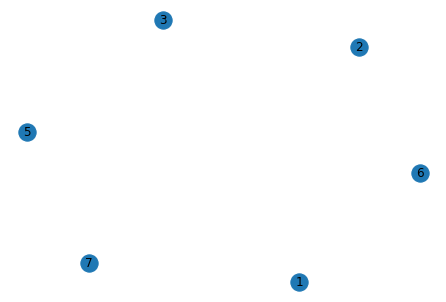

In [3]:

# Adding nodes 1,2,3 individualy
G.add_node(1)
G.add_node(2)
G.add_node(3)

## Adding multiple nodes at once
G.add_nodes_from([5,6,7])


# Checking the graph info
print(nx.info(G))
# Drawing the graph
nx.draw(G, with_labels=True)
plt.grid()

We can also add attributes. An attribute could be anything. You could choose to give a node a name or height or anything.
If we wanted to add a node with a name "Blaise" and a height "6ft", the code would look like this

In [ ]:
G.add_node(10, name= "Blaise", height="6ft")
nx.get_node_attributes(G, "name"), nx.get_node_attributes(G, "height")

We can also add multiple attributes at once. For instance, if we wanted to add the attribute name to nodes 1 to 6. We would do it this way:


In [ ]:
names = {
    1: "one",
    2: "two",
    3: "three",
    4: "Four",
    5: "five",
    6: "six"
}
nx.set_node_attributes(G, names, "names")
print(nx.get_node_attributes(G, "names"))

#### Adding Edges

Adding edges to our graph is also just as easy as adding nodes to it.  There are several ways to add edges to the graph. Some of them include:
- Using the `add_edge()` method. This method adds one edge at a time. It takes in two arguments, which are the nodes to be connected.
- using the `add_edges_from()` method. This method takes in a list of tuples of nodes to be connected by an edge, It can add multiple edges at a time

The code cell below shows these two methods in practice



In [ ]:
# Adding edges
G.add_edge(1,2)
G.add_edges_from([(7,5), (5,1), (1,7), (3,6), (6,7), (6,1)])
print(nx.info(G))
nx.draw(G, with_labels=True)

Simmilary to the nodes, we can also add atrributes to edges. For instance, if node 2 and node 3 are siblings, we might want to show that relationship. The code cell below show how we could do that.


In [4]:
G.add_edge(2,3, relationship= "Siblings")
print(nx.get_edge_attributes(G, "relationship"))

{(2, 3): 'Siblings'}


#### NetworkX and Pandas DataFrames

NetworkX interracts well with pandas DataFrames. I will show how to use networkx with pandas dataframes.

Suppose I just found out that I had covid and wanted to visualize the network of people I interracted with to determine if I might have infected some.
I created a pandas dataframe below

In [5]:
import pandas as pd
data = pd.DataFrame(data=[['Blaise','James'],['James','Matt'], ['Matt', 'Blaise'],
                          ['James', 'Mary'], ['Mary', 'Blaise']], columns=["from", "to"])
data

,from,to
0,Blaise,James
1,James,Matt
2,Matt,Blaise
3,James,Mary
4,Mary,Blaise


In [6]:
GA = nx.from_pandas_edgelist(data, source="from", target="to")
nx.info(GA)

'Graph with 4 nodes and 5 edges'

Graph with 4 nodes and 5 edges


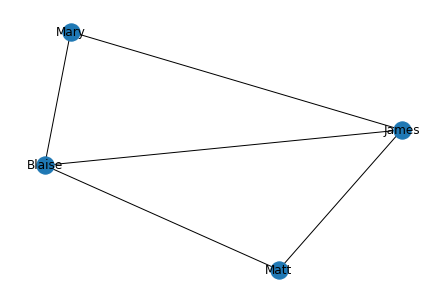

In [7]:
GA = nx.from_pandas_edgelist(data, source="from", target="to")
print(nx.info(GA))
nx.draw(GA, with_labels=True)

#### Adjacency Matrix

We can also generate an adjacency matrix from the graph by using the `adjacency_matrix()` method in the nx module.

In [8]:
adj_mat = nx.adjacency_matrix(GA).todense()
adj_mat

matrix([[0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 0, 0]])

#### Conclusion

Overall, the `networkx` Despite the fact that the library is convenient and can be  powerful in making it easy for a person to work on graph data, It has its own flaws.
One of the biggest flaws of this library (at the current version of it) is that, 
- Each time you run the `nx.draw()` method, you get a different point of view of the visualization. Even though mathematically speacking the representation is the same, This might stand as a problem sometimes if you try to visibly reproduce the visualization of the graph.

With that being said, the nx library still stands as a very powerful too. In this notebook, I just scratched the surfave of the possibilities of the library.

**Thank you For Going Through The Notebook**